# Patterns with K means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('student_habits_performance.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [ ]:
selected_columns = ["age", "study_hours_per_day", "social_media_hours", "netflix_hours", "attendance_percentage", "sleep_hours", "exercise_frequency","mental_health_rating","exam_score"]


#threshold = df['study_hours_per_day'].quantile(0.75)
#filtered_df = df[df['study_hours_per_day'] >= threshold]
#dataframe_selected = filtered_df[selected_columns]

filtered_df = df.sample(frac=0.1, random_state=42)
dataframe_selected = filtered_df[selected_columns]


# Histogram

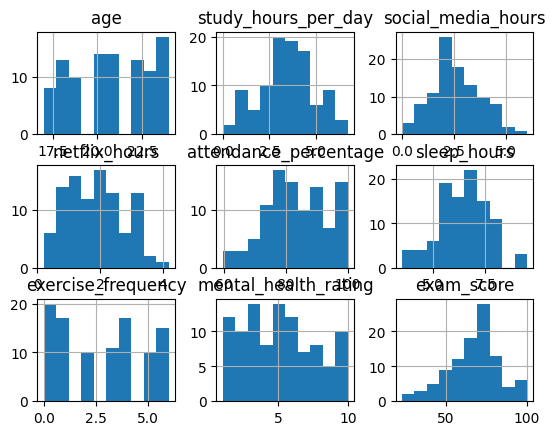

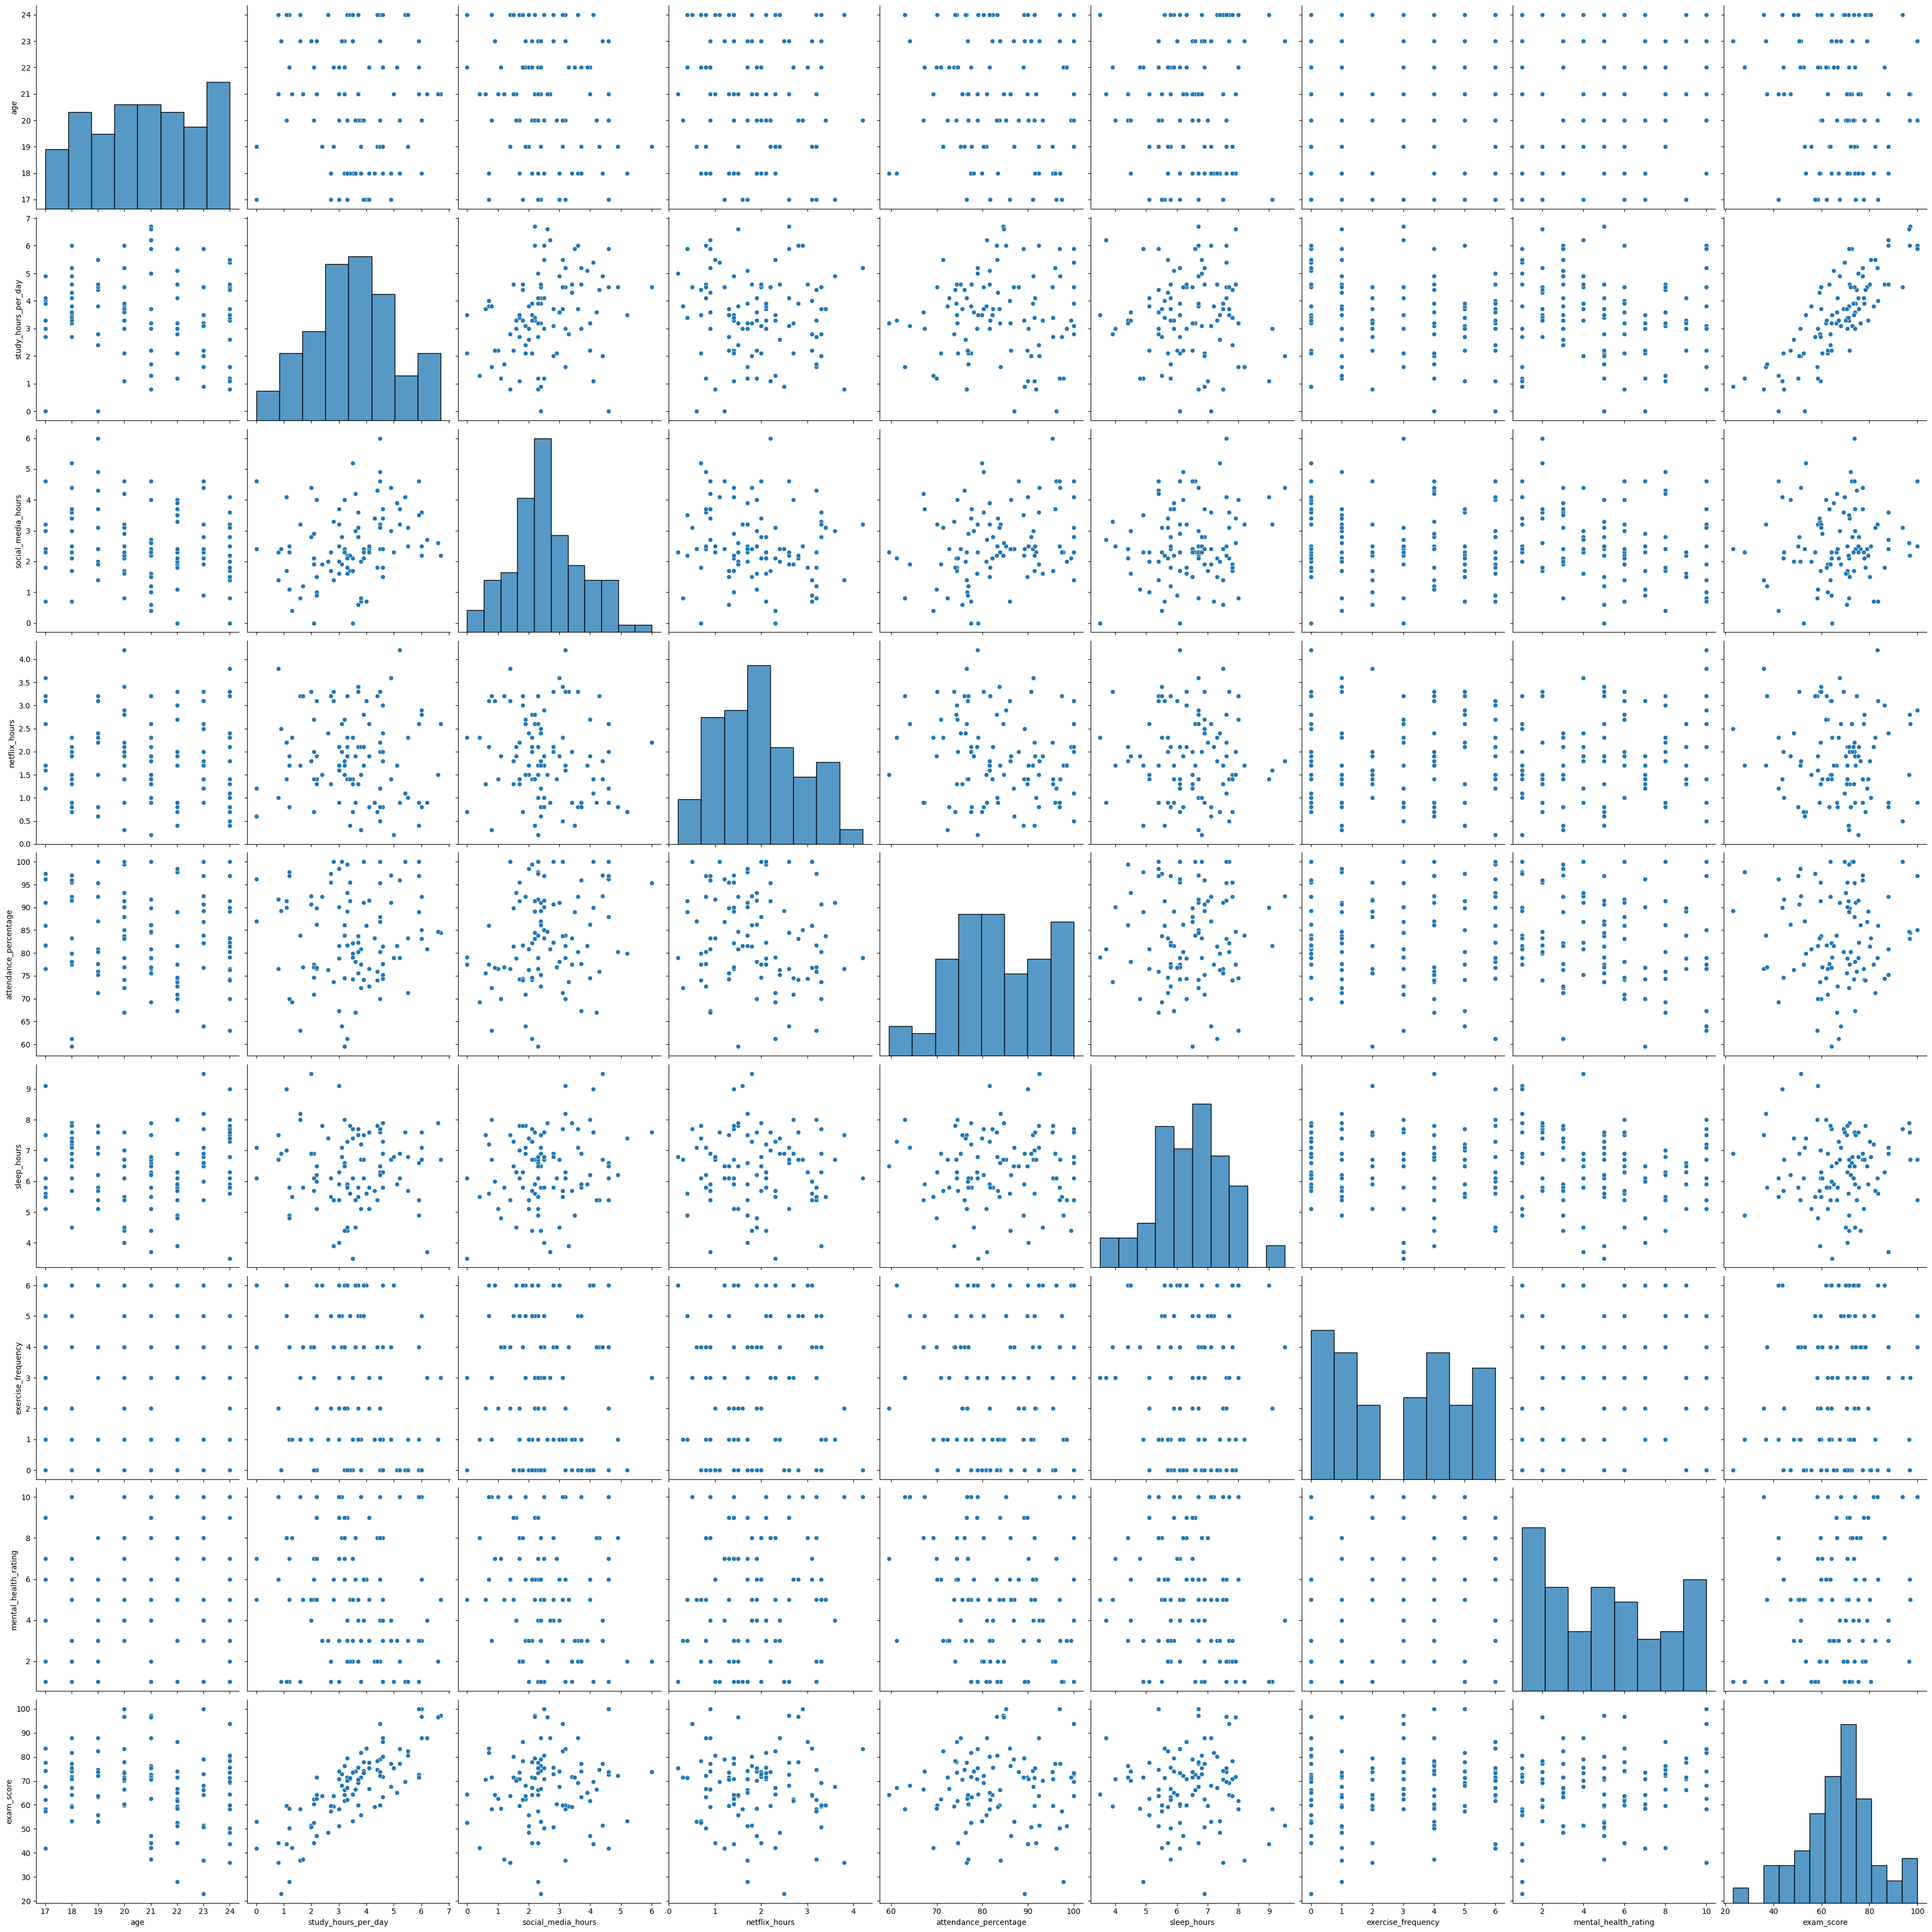

In [ ]:
dataframe_selected.hist()
plt.show()

# Pairplot
sb.pairplot(dataframe_selected, height=4, kind='scatter')
plt.show()

# K-Means with chosen K value

Shape: (100, 9)


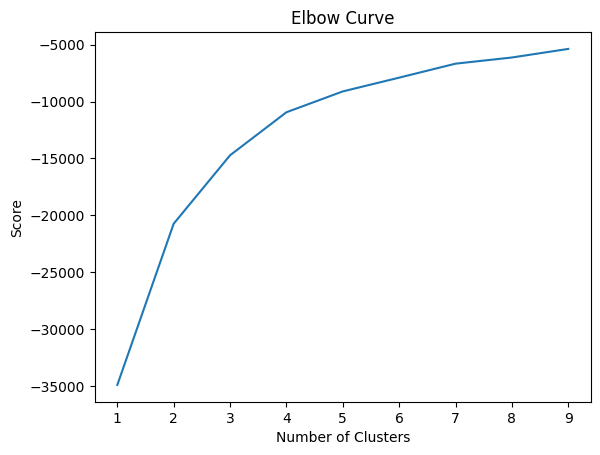

In [ ]:
# Matriz de entrada
X = np.array(dataframe_selected)
print("Shape:", X.shape)

# Elbow curve
Nc = range(1, 10)
kmeans_models = [KMeans(n_clusters=i, n_init=10) for i in Nc]
scores = [model.fit(X).score(X) for model in kmeans_models]
plt.plot(Nc, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

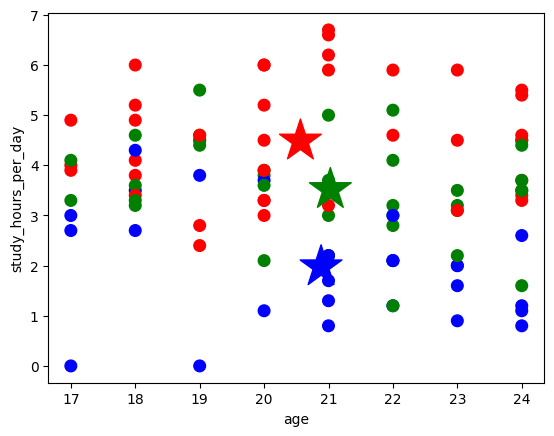

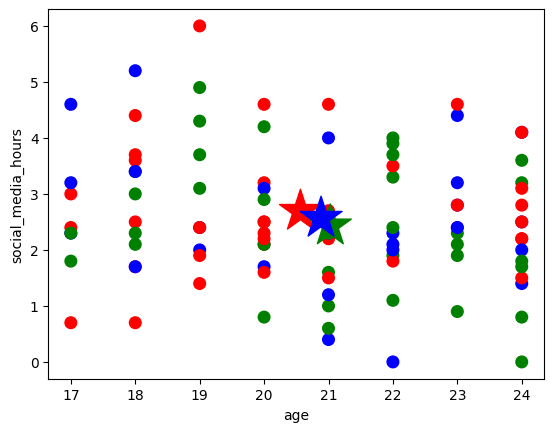

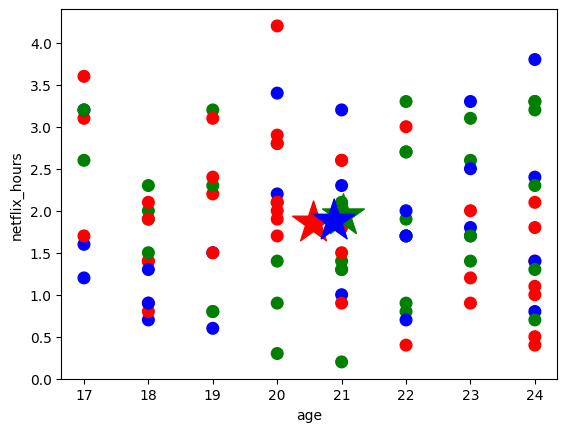

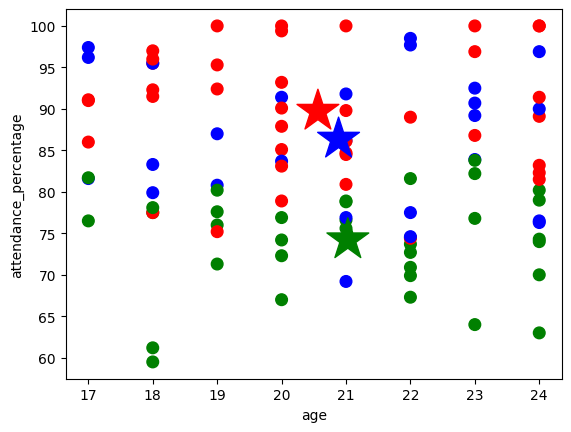

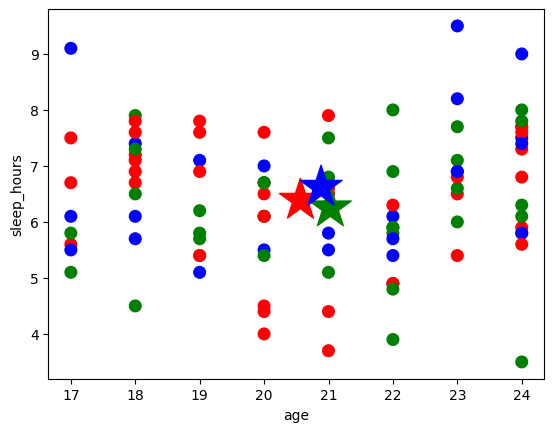

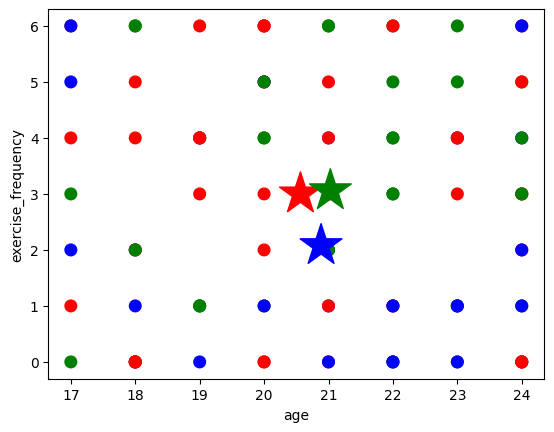

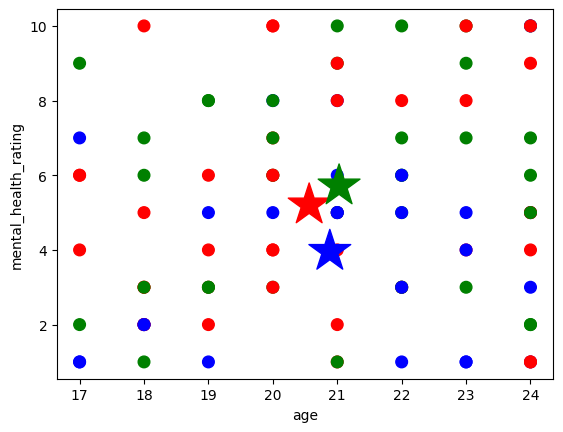

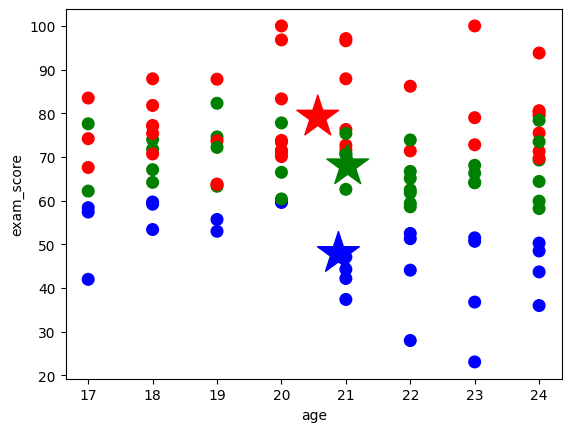

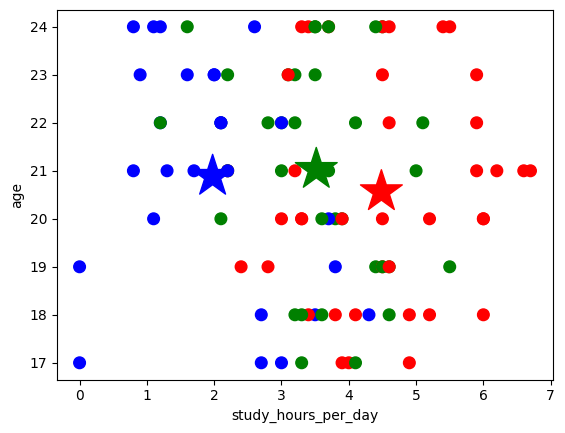

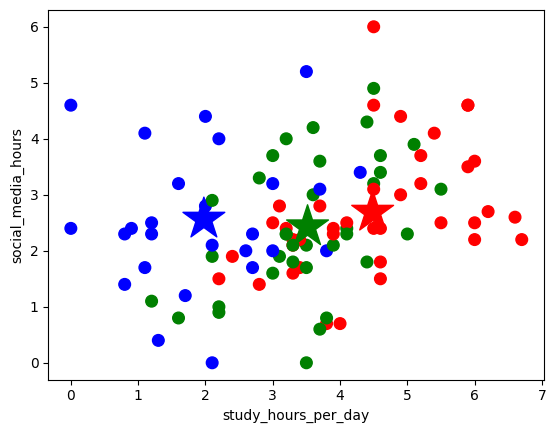

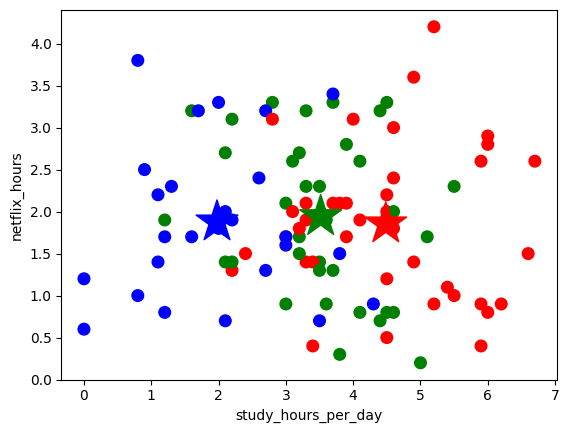

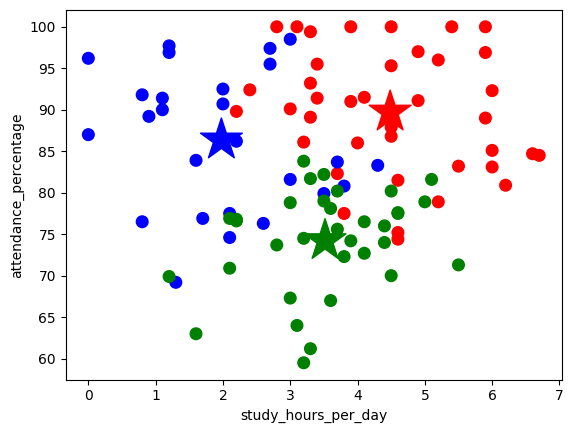

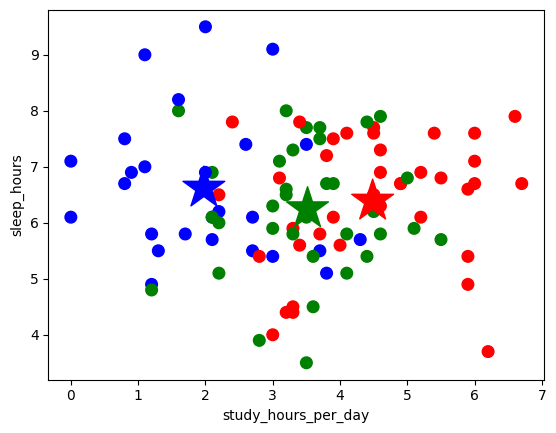

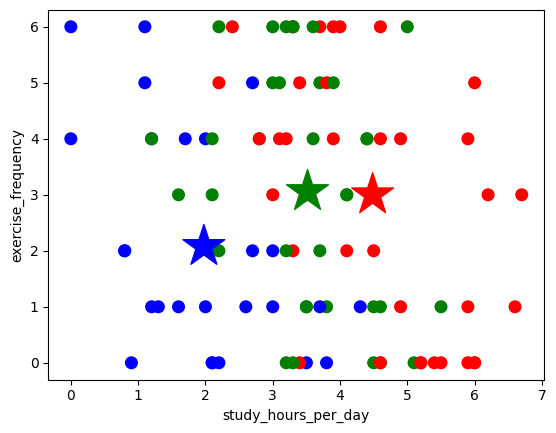

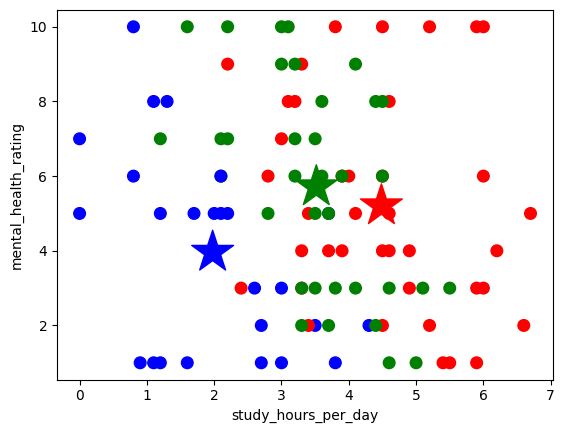

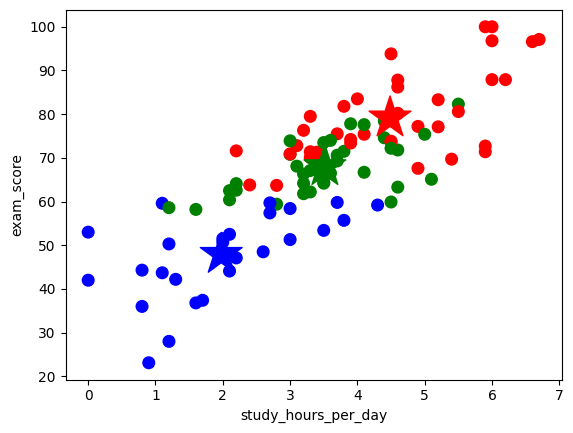

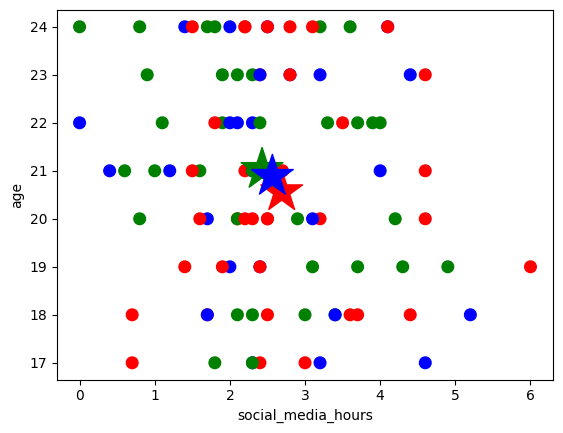

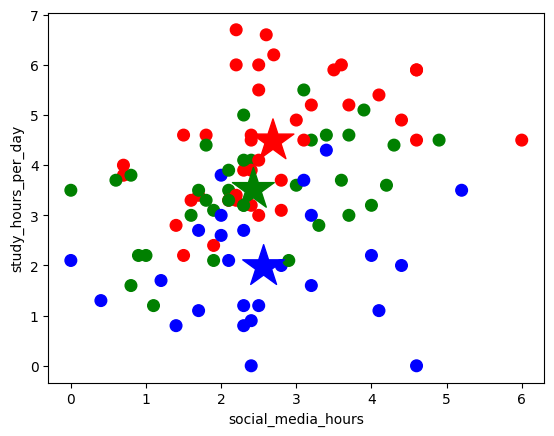

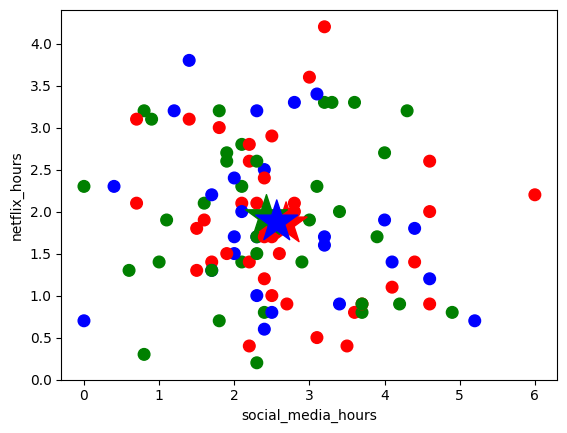

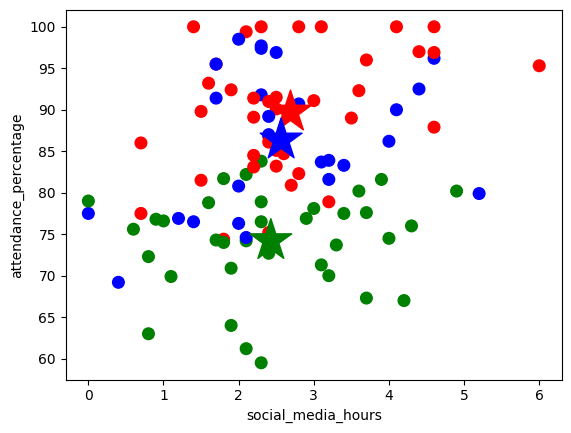

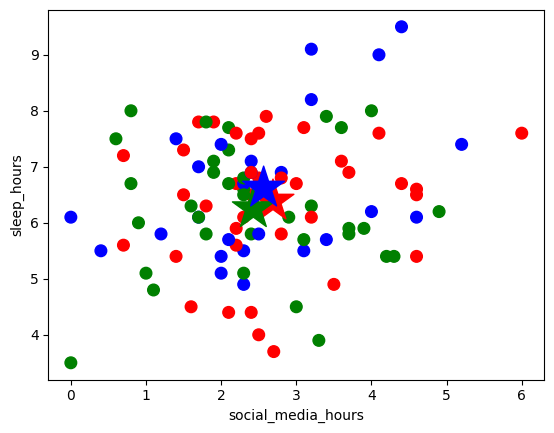

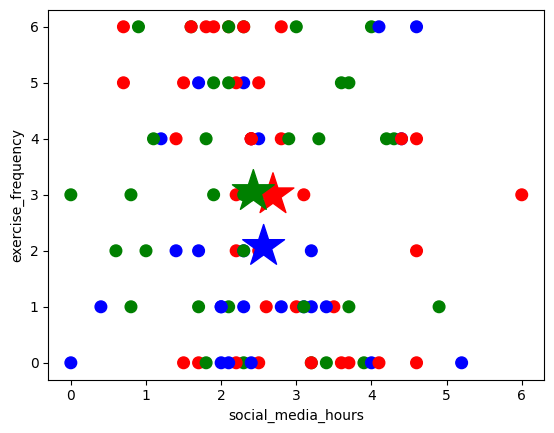

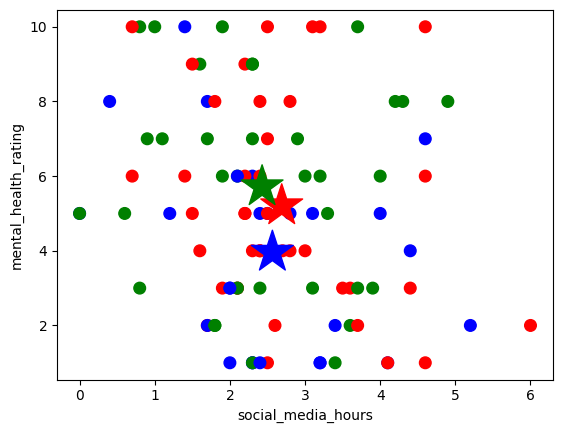

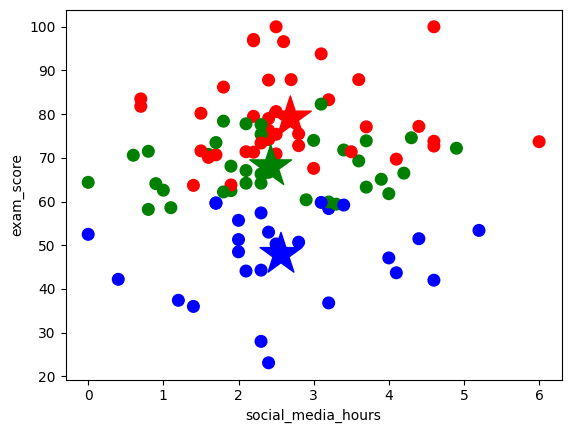

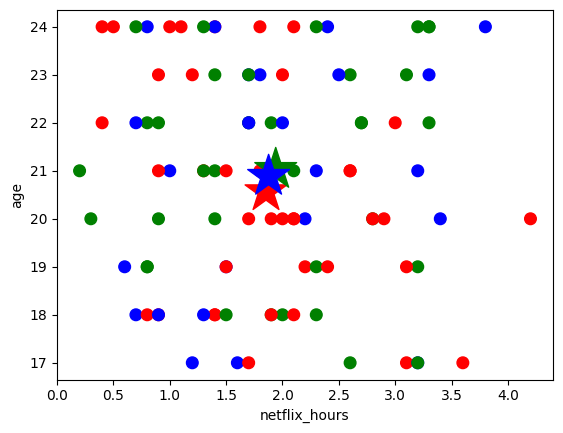

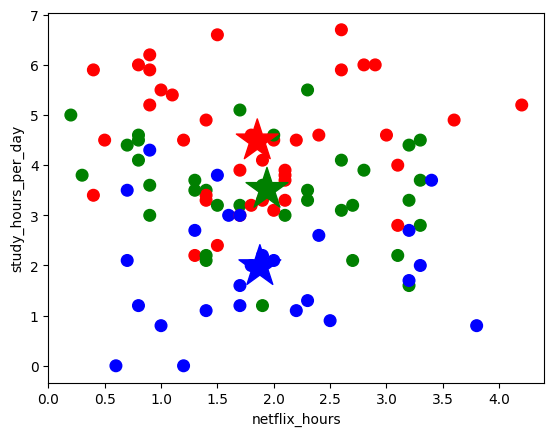

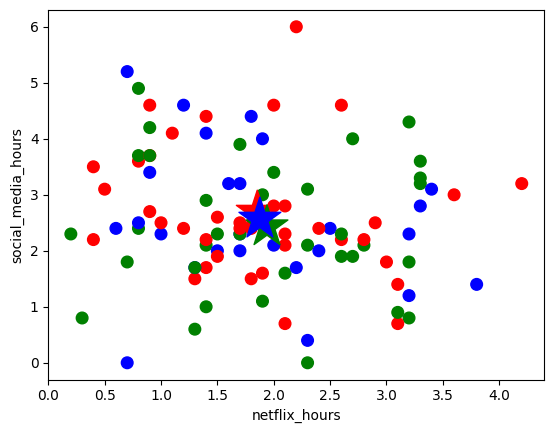

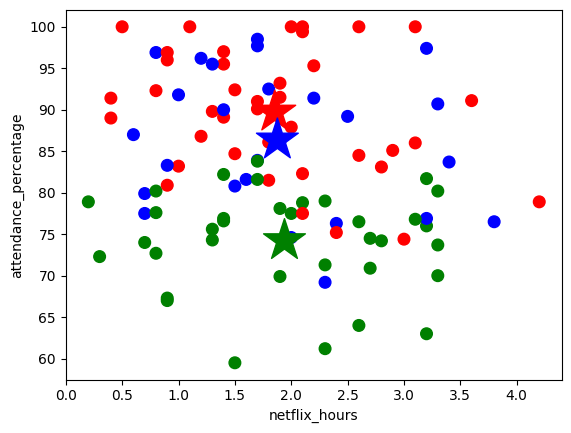

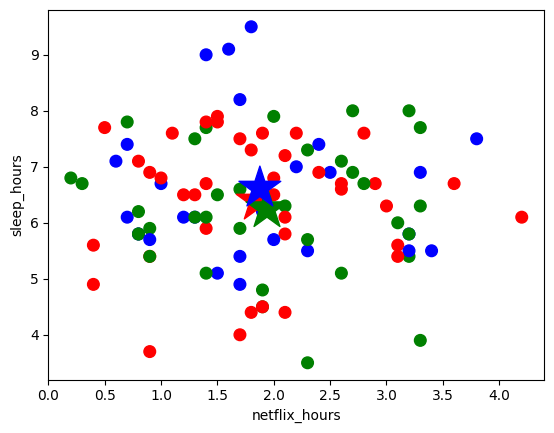

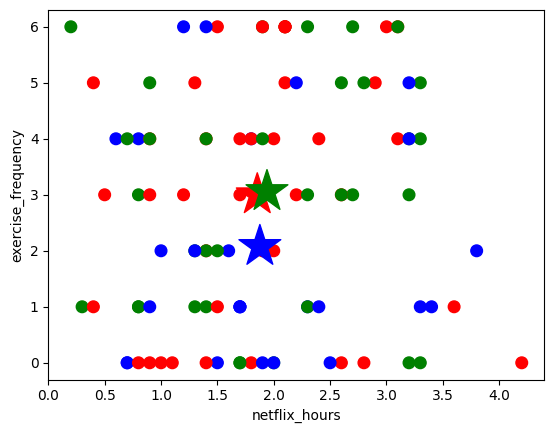

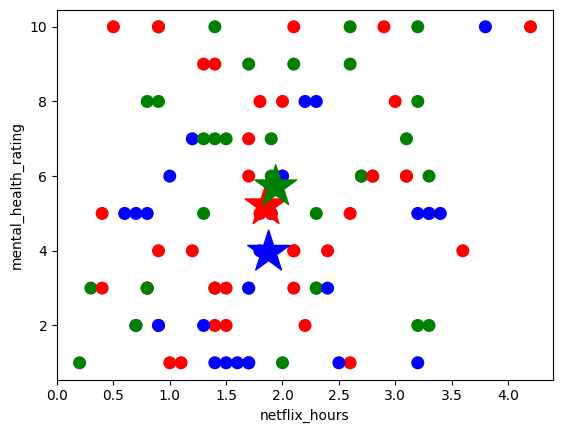

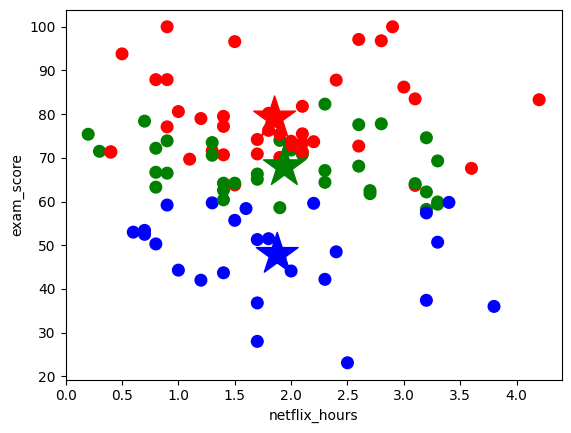

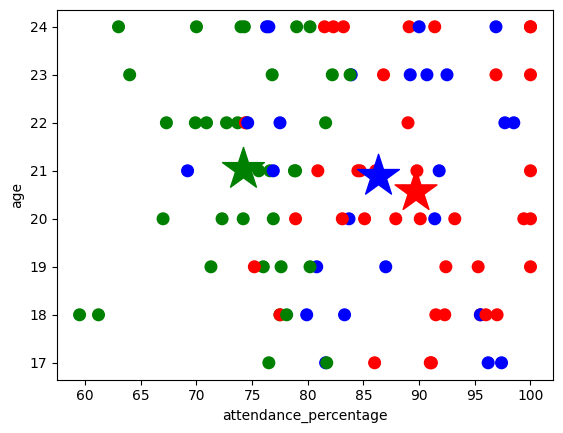

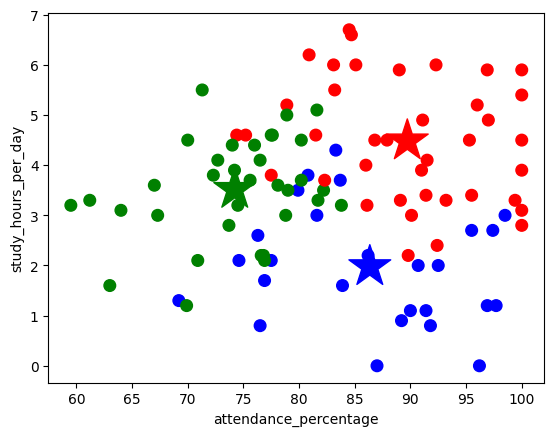

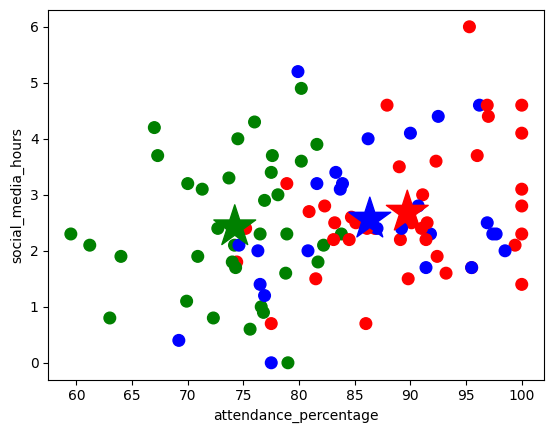

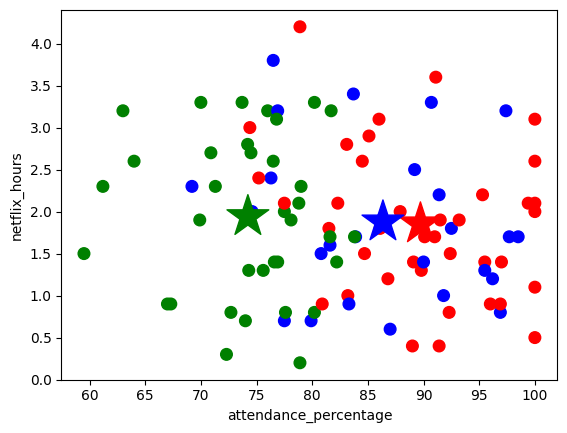

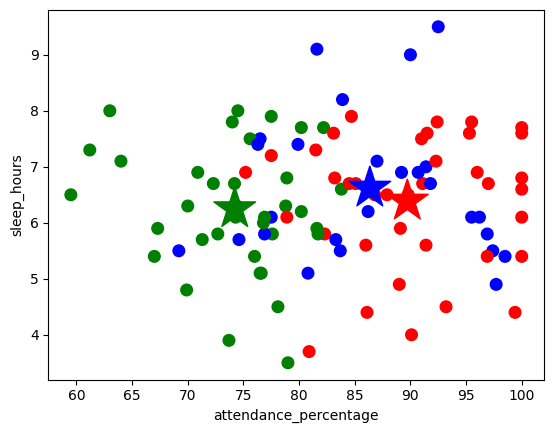

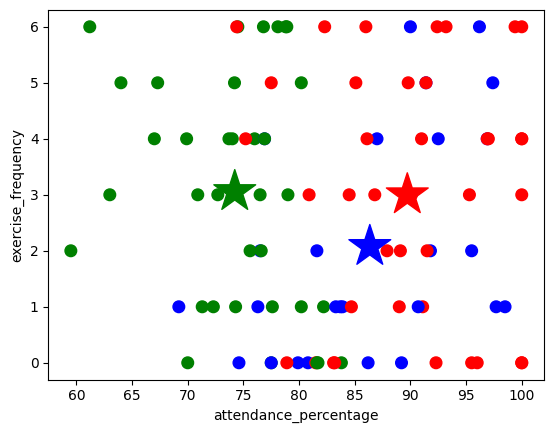

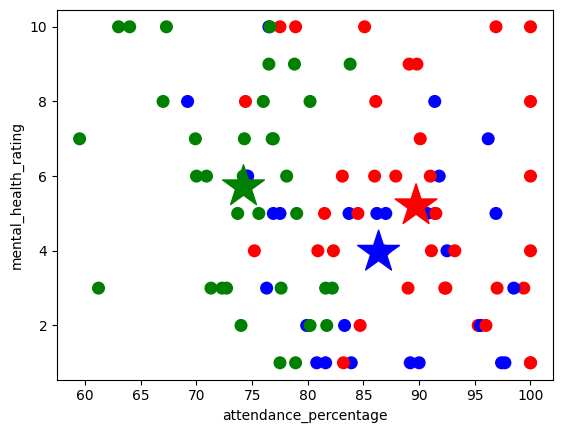

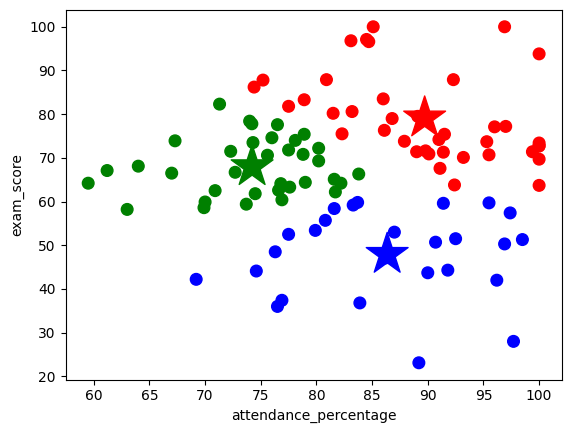

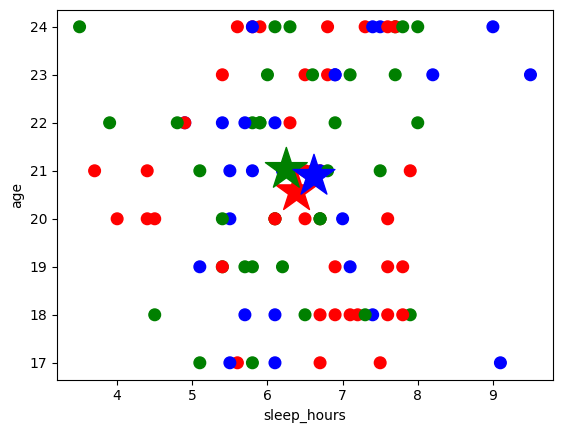

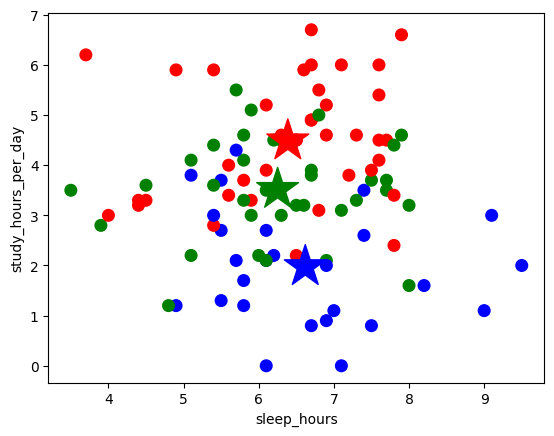

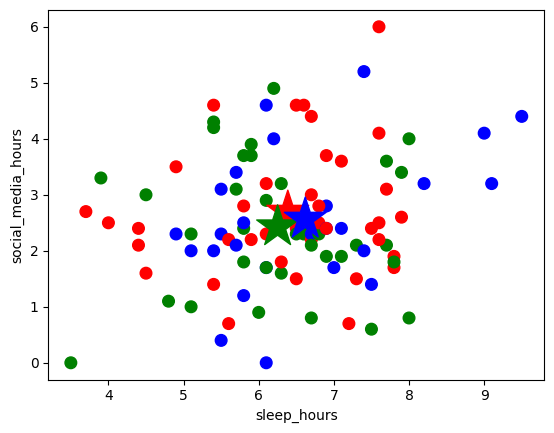

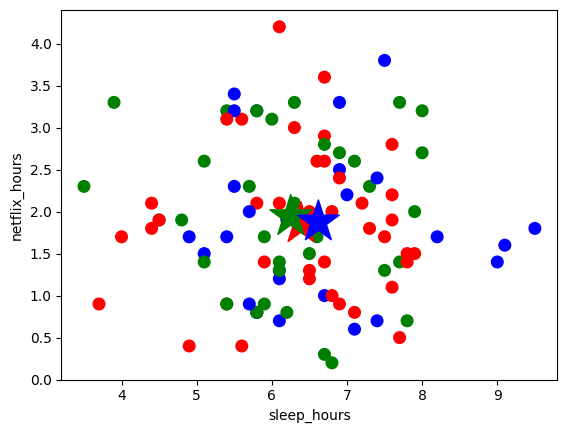

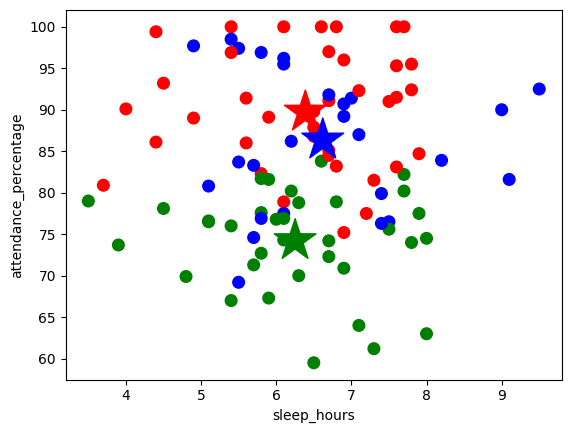

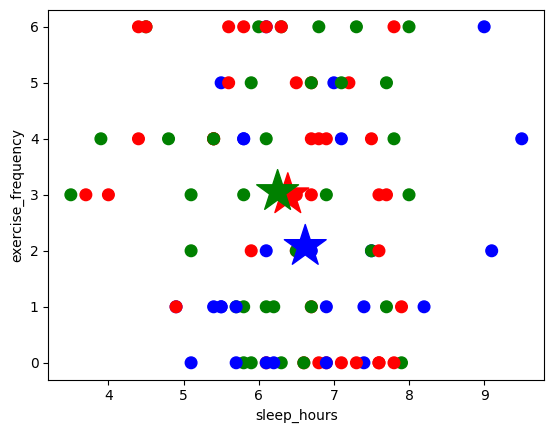

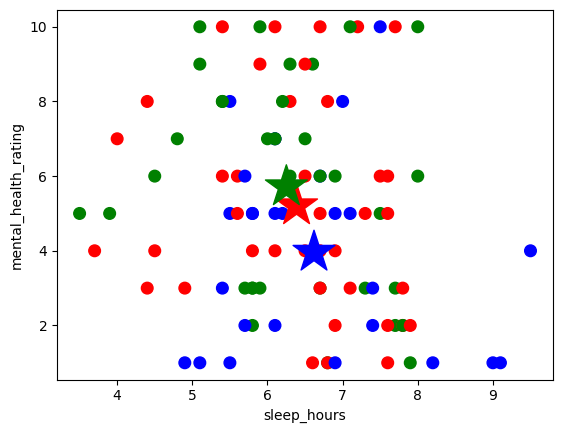

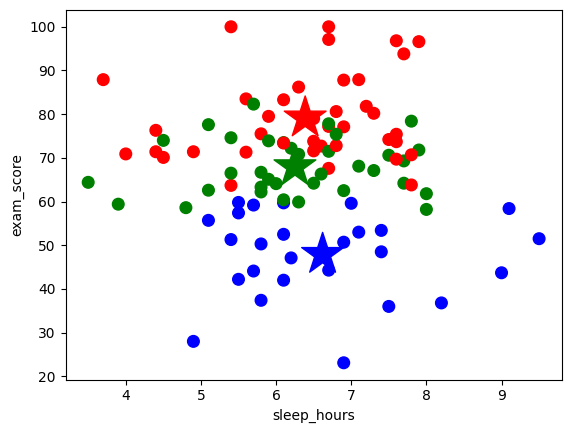

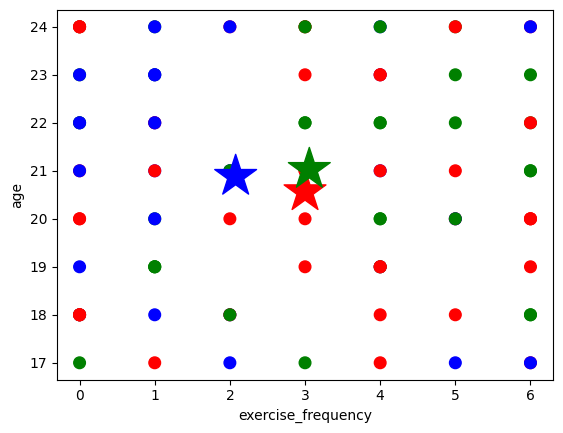

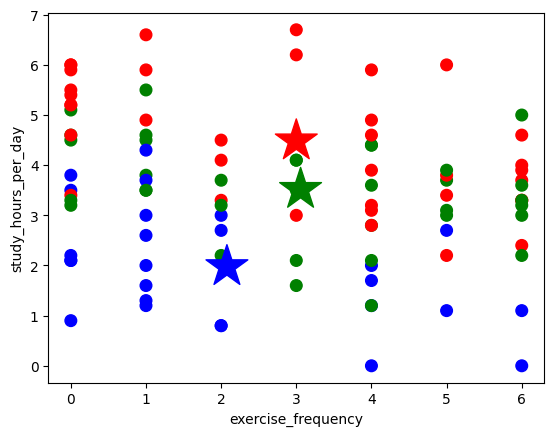

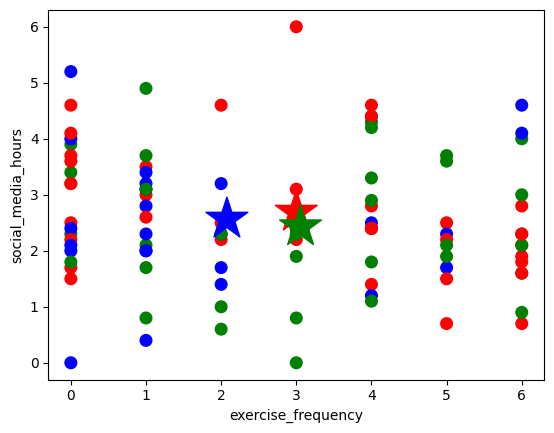

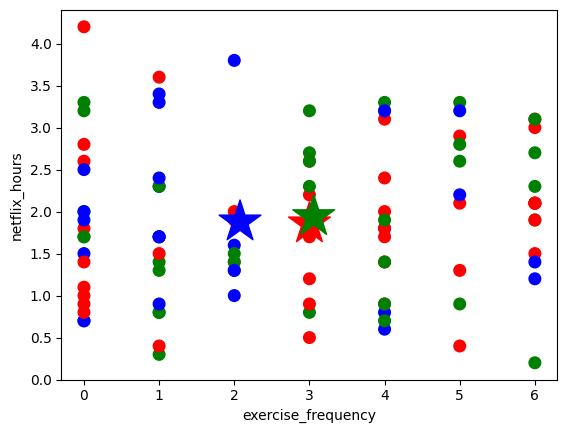

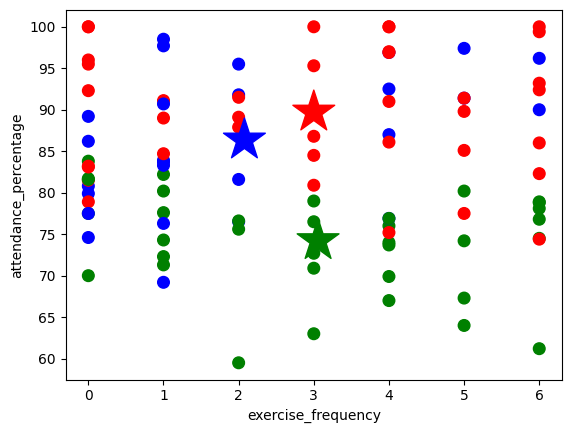

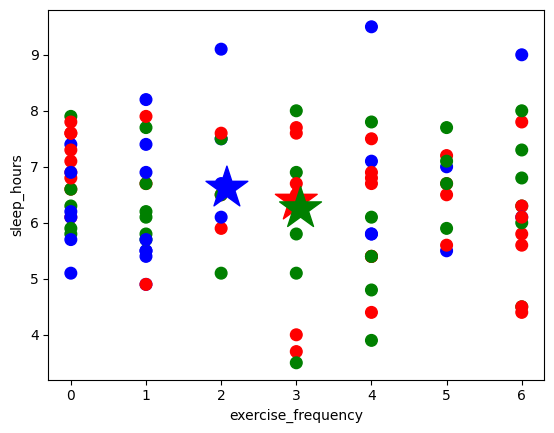

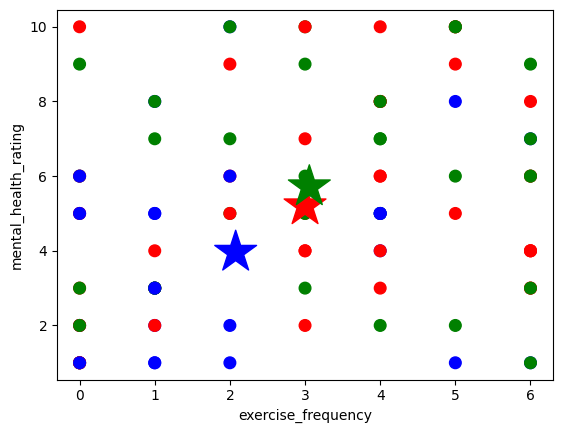

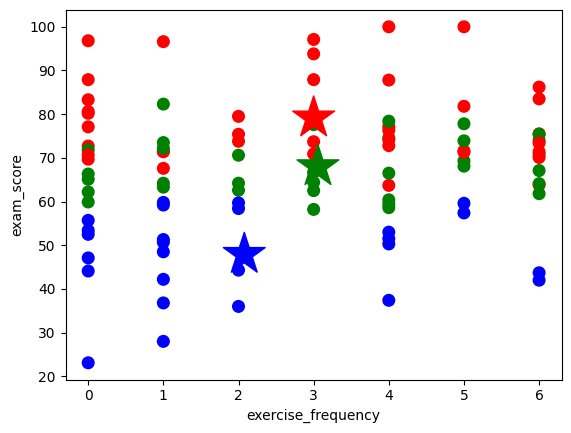

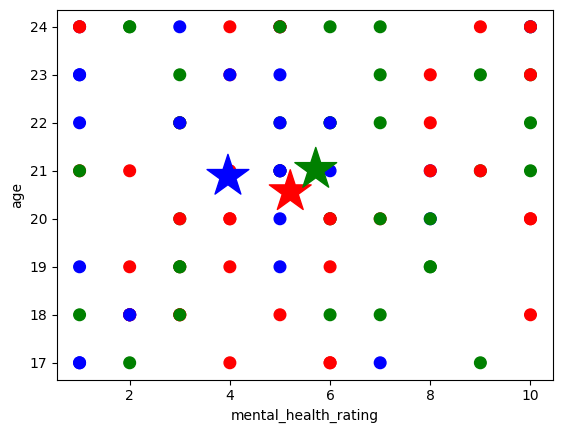

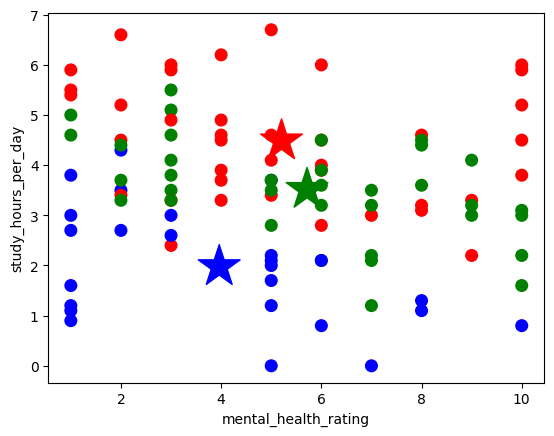

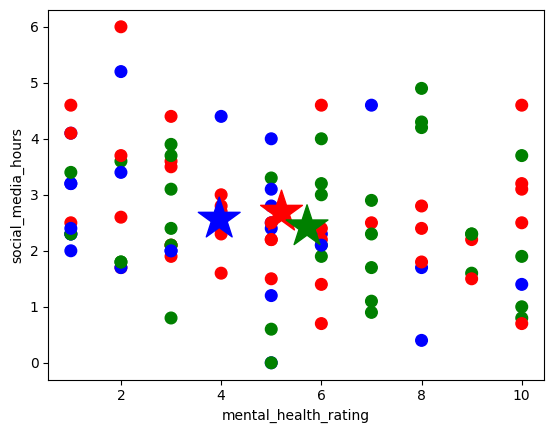

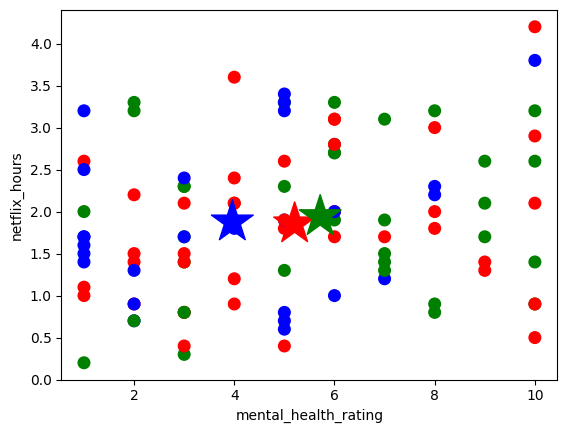

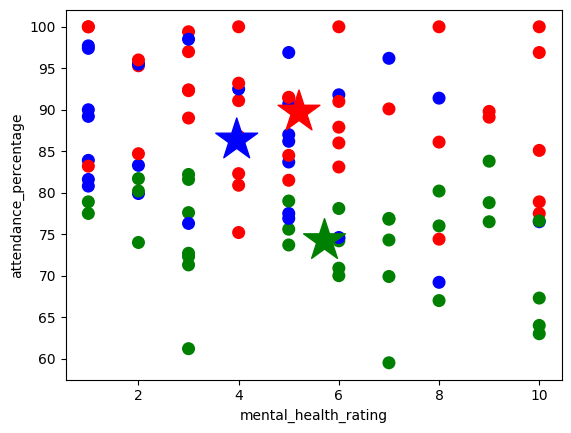

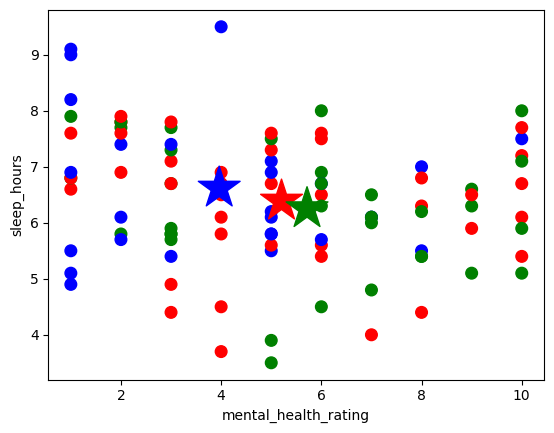

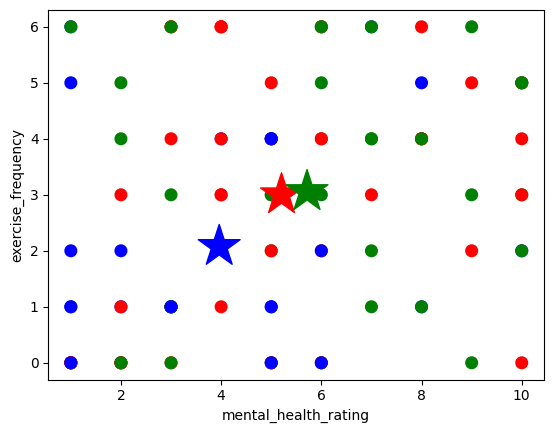

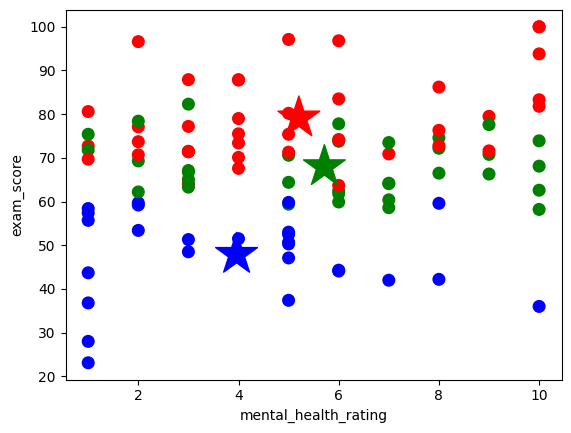

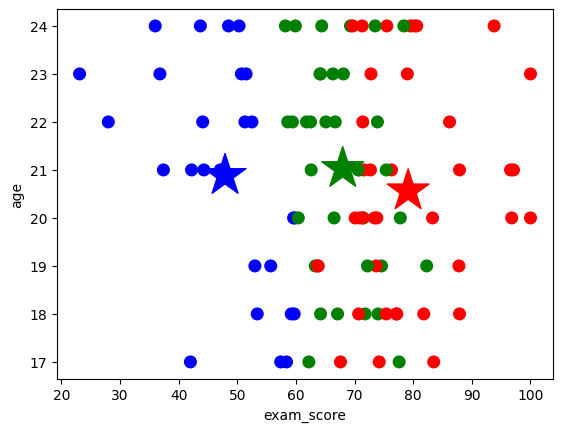

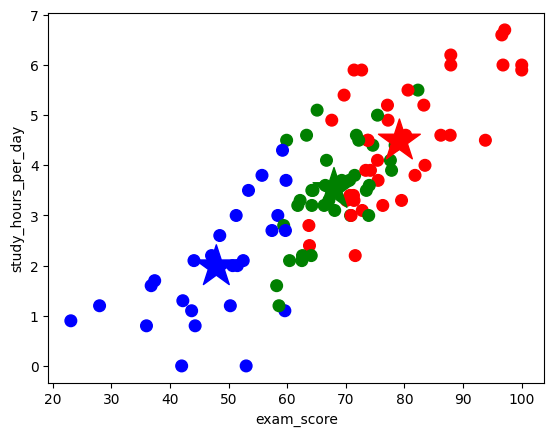

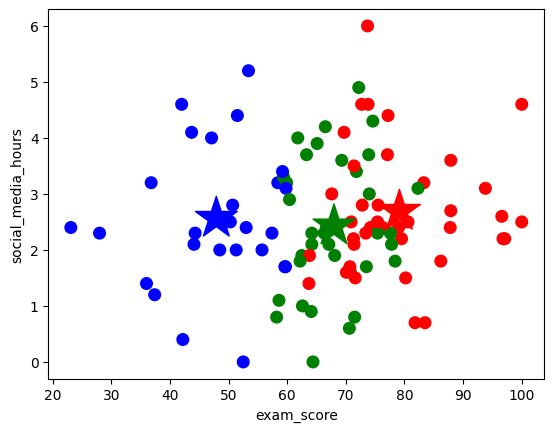

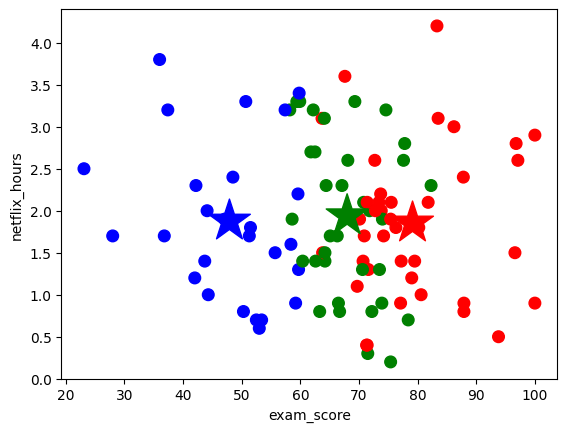

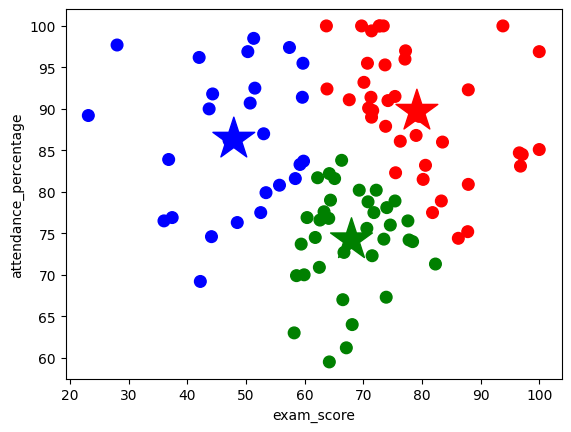

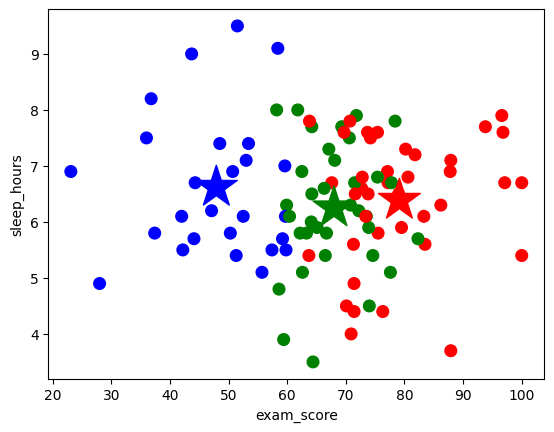

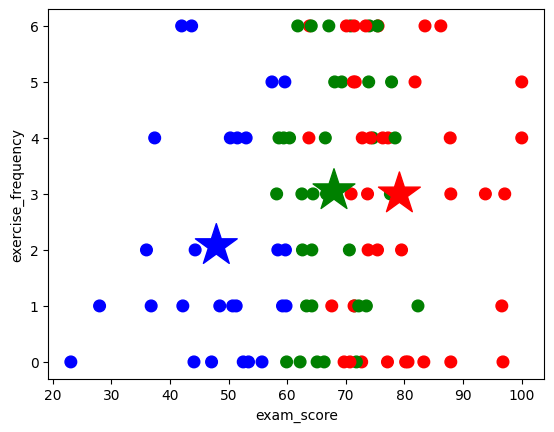

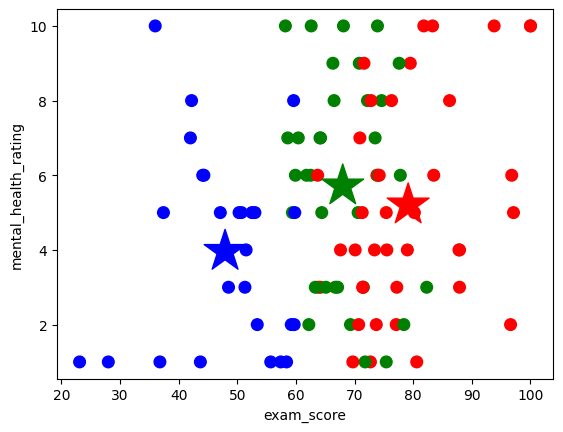

In [ ]:
# Elegir K = 4
kmeans = KMeans(n_clusters=3, n_init=10).fit(dataframe_selected)
labels = kmeans.predict(dataframe_selected)
centroids = kmeans.cluster_centers_

# Asignar colores
colores = ['red','green', 'blue']
asignar = [colores[i] for i in labels]

for i in range(len(selected_columns)):
    for j in range(len(selected_columns)):
        if i != j:
            plt.scatter(X[:, i], X[:, j], c=asignar, s=70)
            plt.scatter(centroids[:, i], centroids[:, j], marker="*", c=colores, s=1000)
            plt.xlabel(selected_columns[i])
            plt.ylabel(selected_columns[j])
            plt.show()